In [23]:
import os, shutil
from pathlib import Path
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

current_dir = Path(os.getcwd()).absolute()
original_dataset_dir = current_dir.joinpath('kaggle_data')
original_train_dir = original_dataset_dir.joinpath('train')
original_test_dir = original_dataset_dir.joinpath('test1')

train_dir = current_dir.joinpath('train')
train_dir.mkdir(parents=True, exist_ok=True)
validation_dir = current_dir.joinpath('validation')
validation_dir.mkdir(parents=True, exist_ok=True)
test_dir = current_dir.joinpath('test')
test_dir.mkdir(parents=True, exist_ok=True)
train_cats_dir = train_dir.joinpath('cats')
train_cats_dir.mkdir(parents=True, exist_ok=True)

train_dogs_dir = train_dir.joinpath('dogs')
train_dogs_dir.mkdir(parents=True, exist_ok=True)

validation_cats_dir  = validation_dir.joinpath('cats')
validation_cats_dir.mkdir(parents=True, exist_ok=True)

validation_dogs_dir = validation_dir.joinpath('dogs')
validation_dogs_dir.mkdir(parents=True, exist_ok=True)

test_cats_dir = test_dir.joinpath('cats')
test_cats_dir.mkdir(parents=True, exist_ok=True)

test_dogs_dir = test_dir.joinpath('dogs')
test_dogs_dir.mkdir(parents=True, exist_ok=True)

In [24]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = train_cats_dir.joinpath(fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = validation_cats_dir.joinpath(fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = test_cats_dir.joinpath(fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = train_dogs_dir.joinpath(fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = validation_dogs_dir.joinpath(fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = original_train_dir.joinpath(fname)
    dst = test_dogs_dir.joinpath(fname)
    shutil.copyfile(src, dst)

In [25]:
print('total train cat images:', len(os.listdir(train_cats_dir)))
print('total train dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total train cat images: 1000
total train dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [30]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [31]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [32]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data  = validation_generator,
    validation_steps = 50)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 22s 221ms/step - loss: 0.6931 - acc: 0.5225 - val_loss: 0.6796 - val_acc: 0.5790
Epoch 2/30
100/100 [==============================] - 20s 204ms/step - loss: 0.6657 - acc: 0.5950 - val_loss: 0.6536 - val_acc: 0.6110
Epoch 3/30
100/100 [==============================] - 21s 207ms/step - loss: 0.6350 - acc: 0.6330 - val_loss: 0.6240 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 21s 208ms/step - loss: 0.5916 - acc: 0.6850 - val_loss: 0.5874 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 21s 207ms/step - loss: 0.5502 - acc: 0.7280 - val_loss: 0.5726 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 21s 207ms/step - loss: 0.5254 - acc: 0.7330 - val_loss: 0.5663 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 21s 208ms/step - loss: 0.5059 - acc: 0.7505 - val_loss: 0.5840 - val_acc: 0.6830
Epoch 8/30
100/100 [==============================] - 2

<Figure size 432x288 with 0 Axes>

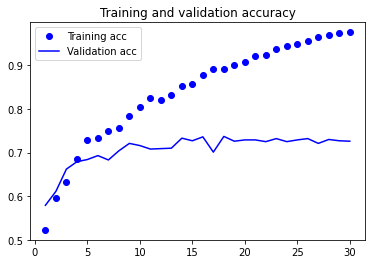

<Figure size 432x288 with 0 Axes>

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

    

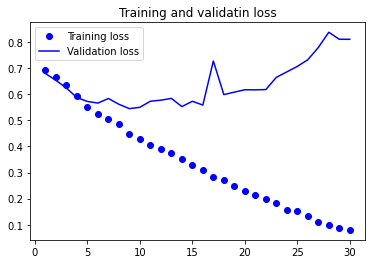

In [34]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

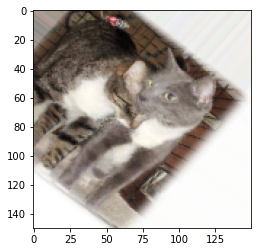

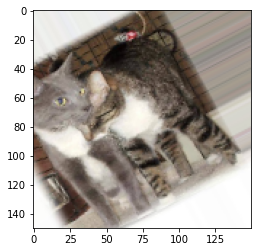

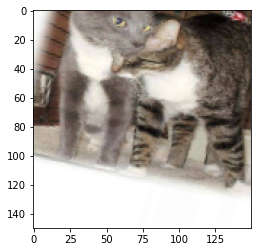

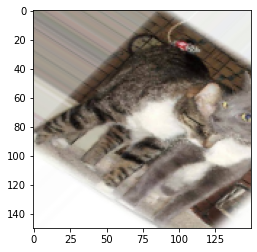

In [36]:
fnames = [train_cats_dir.joinpath(fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])
    
          

In [53]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 62,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 28s 456ms/step - loss: 0.5994 - acc: 0.6819 - val_loss: 0.5895 - val_acc: 0.6790
Epoch 2/100
62/62 [==============================] - 28s 453ms/step - loss: 0.5977 - acc: 0.6778 - val_loss: 0.6153 - val_acc: 0.6540
Epoch 3/100
62/62 [==============================] - 28s 455ms/step - loss: 0.5990 - acc: 0.6789 - val_loss: 0.5852 - val_acc: 0.6770
Epoch 4/100
62/62 [==============================] - 28s 457ms/step - loss: 0.5908 - acc: 0.6885 - val_loss: 0.6046 - val_acc: 0.6900
Epoch 5/100
62/62 [==============================] - 28s 456ms/step - loss: 0.5910 - acc: 0.6784 - val_loss: 0.5686 - val_acc: 0.6840
Epoch 6/100
62/62 [==============================] - 28s 457ms/step - loss: 0.5795 - acc: 0.6961 - val_loss: 0.5877 - val_acc: 0.6780
Epoch 7/100
62/62 [==============================] - 28s 456ms/step - loss: 0.5788 - acc: 0.6982 - val_loss: 0.5

Epoch 18/100
62/62 [==============================] - 28s 456ms/step - loss: 0.5456 - acc: 0.7175 - val_loss: 0.5422 - val_acc: 0.7270
Epoch 19/100
62/62 [==============================] - 28s 456ms/step - loss: 0.5361 - acc: 0.7327 - val_loss: 0.5466 - val_acc: 0.7110
Epoch 20/100
62/62 [==============================] - 28s 457ms/step - loss: 0.5412 - acc: 0.7221 - val_loss: 0.5443 - val_acc: 0.7130
Epoch 21/100
62/62 [==============================] - 28s 456ms/step - loss: 0.5367 - acc: 0.7348 - val_loss: 0.5495 - val_acc: 0.7130
Epoch 22/100
62/62 [==============================] - 28s 456ms/step - loss: 0.5258 - acc: 0.7444 - val_loss: 0.5236 - val_acc: 0.7290
Epoch 23/100
62/62 [==============================] - 28s 456ms/step - loss: 0.5249 - acc: 0.7393 - val_loss: 0.5317 - val_acc: 0.7150
Epoch 24/100
62/62 [==============================] - 28s 456ms/step - loss: 0.5164 - acc: 0.7449 - val_loss: 0.5286 - val_acc: 0.7210
Epoch 25/100
62/62 [==============================] - 2

62/62 [==============================] - 28s 459ms/step - loss: 0.4647 - acc: 0.7790 - val_loss: 0.4860 - val_acc: 0.7600
Epoch 53/100
62/62 [==============================] - 28s 456ms/step - loss: 0.4475 - acc: 0.7927 - val_loss: 0.4839 - val_acc: 0.7730
Epoch 54/100
62/62 [==============================] - 28s 458ms/step - loss: 0.4714 - acc: 0.7754 - val_loss: 0.4583 - val_acc: 0.7770
Epoch 55/100
62/62 [==============================] - 28s 457ms/step - loss: 0.4501 - acc: 0.7947 - val_loss: 0.4719 - val_acc: 0.7630
Epoch 56/100
62/62 [==============================] - 28s 455ms/step - loss: 0.4559 - acc: 0.7800 - val_loss: 0.4904 - val_acc: 0.7550
Epoch 57/100
62/62 [==============================] - 28s 458ms/step - loss: 0.4527 - acc: 0.7846 - val_loss: 0.5005 - val_acc: 0.7500
Epoch 58/100
62/62 [==============================] - 28s 457ms/step - loss: 0.4487 - acc: 0.7901 - val_loss: 0.5079 - val_acc: 0.7480
Epoch 59/100
62/62 [==============================] - 28s 455ms/step

62/62 [==============================] - 28s 455ms/step - loss: 0.3983 - acc: 0.8145 - val_loss: 0.4896 - val_acc: 0.7720
Epoch 87/100
62/62 [==============================] - 28s 457ms/step - loss: 0.4053 - acc: 0.8257 - val_loss: 0.4872 - val_acc: 0.7750
Epoch 88/100
62/62 [==============================] - 28s 456ms/step - loss: 0.4099 - acc: 0.8028 - val_loss: 0.4531 - val_acc: 0.8000
Epoch 89/100
62/62 [==============================] - 28s 454ms/step - loss: 0.4164 - acc: 0.8064 - val_loss: 0.5301 - val_acc: 0.7350
Epoch 90/100
62/62 [==============================] - 28s 458ms/step - loss: 0.3999 - acc: 0.8074 - val_loss: 0.4612 - val_acc: 0.7870
Epoch 91/100
62/62 [==============================] - 28s 457ms/step - loss: 0.4101 - acc: 0.8120 - val_loss: 0.4631 - val_acc: 0.7770
Epoch 92/100
62/62 [==============================] - 28s 456ms/step - loss: 0.4080 - acc: 0.8181 - val_loss: 0.4636 - val_acc: 0.7880
Epoch 93/100
62/62 [==============================] - 28s 458ms/step

In [55]:
model.save('cats_and_dogs_small_2.h5')

<Figure size 432x288 with 0 Axes>

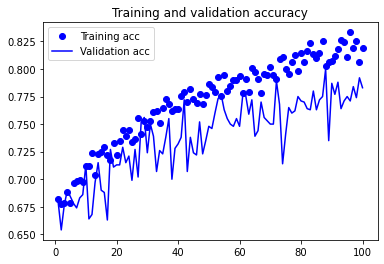

<Figure size 432x288 with 0 Axes>

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

    

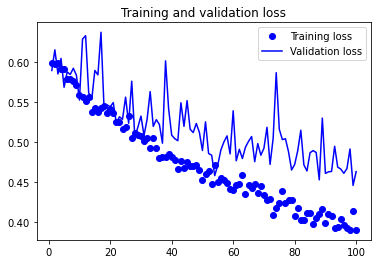

In [58]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()